In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,precision_score,recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv(r"C:\Users\Shashikanth\Downloads\Placement_Data.csv")

In [3]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [5]:
df['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [6]:
df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [7]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [8]:
df['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [9]:
df['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [11]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [12]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df['salary'].fillna(value=0, inplace=True)

In [15]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [16]:
df['salary'].unique()

array([270000., 200000., 250000.,      0., 425000., 252000., 231000.,
       260000., 218000., 300000., 236000., 265000., 393000., 360000.,
       240000., 350000., 278000., 320000., 411000., 287000., 204000.,
       450000., 216000., 220000., 268000., 275000., 336000., 230000.,
       500000., 400000., 210000., 420000., 380000., 280000., 276000.,
       940000., 225000., 233000., 690000., 340000., 255000., 285000.,
       290000., 650000., 264000., 295000.])

In [17]:
df.drop(['sl_no','salary'], axis=1, inplace=True)

In [18]:
df.duplicated().sum()

0

* Sl_no.: Candidate serial number
* Gender: Gender of the candidate
* Ssc_p: Percentage of marks in Secondary Education/ 10th
* ssc_b: Board of Secondary education - Central/Others
* Hsc_p: Percentage of marks in Higher Secondary Education/ 12th
* hsc_b: Board of Higher Secondary Education - Central/Others
* hsc_s: Specialization in Higher Secondary Education/12th
* Degree_p: Percentage of marks in Degree
* Degree_t: Undergraduation type/ Field of degree education
* workex: Any previous experience
* Etest_p: Employability test percentage
* specialisation: Post Graduation(MBA) specialization
* Mba_p: Percentage of marks in MBA
* Status: Candidate placed or not, Target variable
* Salary: If placed, what is the salary offered by the company to the candidate

In [19]:
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000


<Axes: >

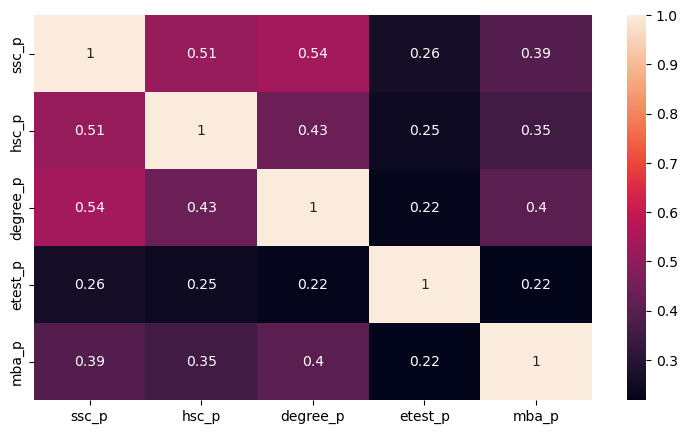

In [20]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(), annot=True)

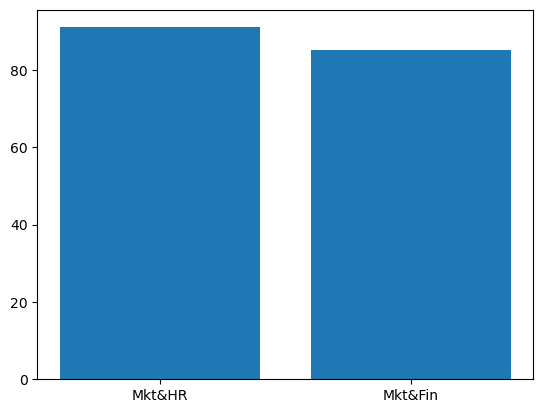

In [21]:
plt.bar(data=df, x='specialisation', height='degree_p',)
plt.show()

In [22]:
pd.pivot_table(data = df, index=['degree_t','degree_p'], columns='specialisation', aggfunc='mean')

etest_p          hsc_p           mba_p           ssc_p  \
specialisation     Mkt&Fin Mkt&HR Mkt&Fin  Mkt&HR Mkt&Fin  Mkt&HR Mkt&Fin   
degree_t  degree_p                                                          
Comm&Mgmt 50.00        NaN  76.00     NaN  47.000     NaN  54.960     NaN   
          50.20       76.0    NaN    54.6     NaN   65.33     NaN   52.58   
          50.80        NaN  67.00     NaN  57.000     NaN  62.790     NaN   
          53.00        NaN  80.10     NaN  51.915     NaN  62.855     NaN   
          54.00        NaN  72.00     NaN  62.000     NaN  55.410     NaN   
...                    ...    ...     ...     ...     ...     ...     ...   
Sci&Tech  77.72        NaN  81.20     NaN  73.400     NaN  76.260     NaN   
          78.00        NaN  97.00     NaN  80.000     NaN  70.480     NaN   
          78.86       97.4    NaN    97.7     NaN   74.01     NaN   76.50   
          84.00       98.0    NaN    60.5     NaN   65.25     NaN   75.40   
          91.00        NaN  59.32     NaN  53.000     NaN  69.710     NaN   

                            
specialisation      Mkt&HR  
degree_t  degree_p          
Comm&Mgmt 50.00     62.000  
          50.20        NaN  
          50.80     52.000  
          53.00     51.445  
          54.00     52.000  
...                    ...  
Sci&Tech  77.72     80.400  
          78.00     76.000  
          78.86        NaN  
          84.00        NaN  
          91.00     83.960  

[112 rows x 8 columns]

In [23]:
#sns.pairplot(data=df)

In [24]:
df.var()

ssc_p       117.228377
hsc_p       118.755706
degree_p     54.151103
etest_p     176.251018
mba_p        34.028376
dtype: float64

## Splitting the Data

In [25]:
X=df.drop("status",axis=1)
y=df['status']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [40]:
X_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
101,M,63.0,Central,72.0,Central,Commerce,68.00,Comm&Mgmt,No,78.00,Mkt&HR,60.44
90,F,85.0,Others,90.0,Others,Commerce,82.00,Comm&Mgmt,No,92.00,Mkt&Fin,68.03
50,F,75.2,Central,73.2,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98
139,M,77.0,Central,70.0,Central,Commerce,59.00,Comm&Mgmt,Yes,58.00,Mkt&Fin,54.43
61,M,84.2,Central,73.4,Central,Commerce,66.89,Comm&Mgmt,No,61.60,Mkt&Fin,62.48
...,...,...,...,...,...,...,...,...,...,...,...,...
144,M,52.0,Others,50.0,Others,Arts,61.00,Comm&Mgmt,No,60.00,Mkt&Fin,58.52
118,M,76.0,Central,80.0,Central,Science,78.00,Sci&Tech,Yes,97.00,Mkt&HR,70.48
189,F,54.0,Central,77.6,Others,Commerce,69.20,Comm&Mgmt,No,95.65,Mkt&Fin,66.94
206,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39


In [41]:
X.select_dtypes(include='number').columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')

In [42]:
X.select_dtypes(include='object').columns

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation'],
      dtype='object')

In [53]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

numerical_features = X.select_dtypes(include=np.number).columns
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))])

categorical_features = X.select_dtypes(include='object').columns
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features),
                 ('num',numerical_transformer,numerical_features)])

estimator = MultinomialNB()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', estimator)])

pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred_test)

0.8888888888888888

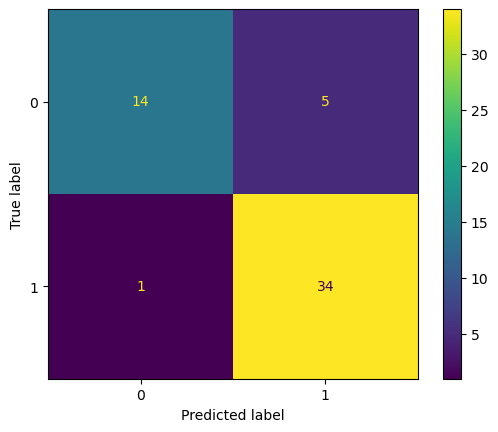

In [55]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test)).plot()

In [56]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

  Not Placed       0.93      0.74      0.82        19
      Placed       0.87      0.97      0.92        35

    accuracy                           0.89        54
   macro avg       0.90      0.85      0.87        54
weighted avg       0.89      0.89      0.89        54



In [57]:
import pickle
with open('Campus_placement.pkl', 'wb') as file:
    pickle.dump(pipeline, file)